# 추세추종 매매법

- 매수 : %b > 0.8 and MFI > 80
- 매도 : %b < 0.2 and MFI < 20

## 국내

In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/Administrator/Desktop/stock_study/')

from Investar import Analyzer

In [2]:
mk = Analyzer.MarketDB()

In [3]:
df = mk.get_daily_price("삼성전자","2019-06-14" ,"2021-01-06")

In [4]:
df["MA20"] = df.close.rolling(window=20).mean()  # 20개 종가를 이용하여 평균을 구한다 (20일 이평선) => 중간 볼린저 밴드
df['stddev'] = df.close.rolling(window=20).std() # 20개 종가를 이용해서 표준편차를 구한 뒤 stddev에 추가
df["upper"] = df["MA20"] + (df.stddev*2)         # 중간 볼린저 밴드 + ( 2 * 표준편차) => 상단 볼린저 밴드
df["lower"] = df["MA20"] - (df.stddev*2)         # 중간 볼린저 밴드 - ( 2 * 표준편차) => 하단 볼린저 밴드
df["PB"] = (df.close-df.lower) / (df.upper - df. lower) 

In [5]:
df["TP"] = (df.high + df.low + df.close) / 3
df["PMF"] = 0
df["NMF"] = 0

In [6]:
for i in range(len(df.close)-1):
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.NMF.values[i+1] = 0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.volume.values[i+1]
        df.PMF.values[i+1] = 0
        
df["MFR"] = df.PMF.rolling(window=10).sum() / df.NMF.rolling(window=10).sum()
df["MFI10"] = 100 - 100 /(1+df["MFR"])
df = df[19:]

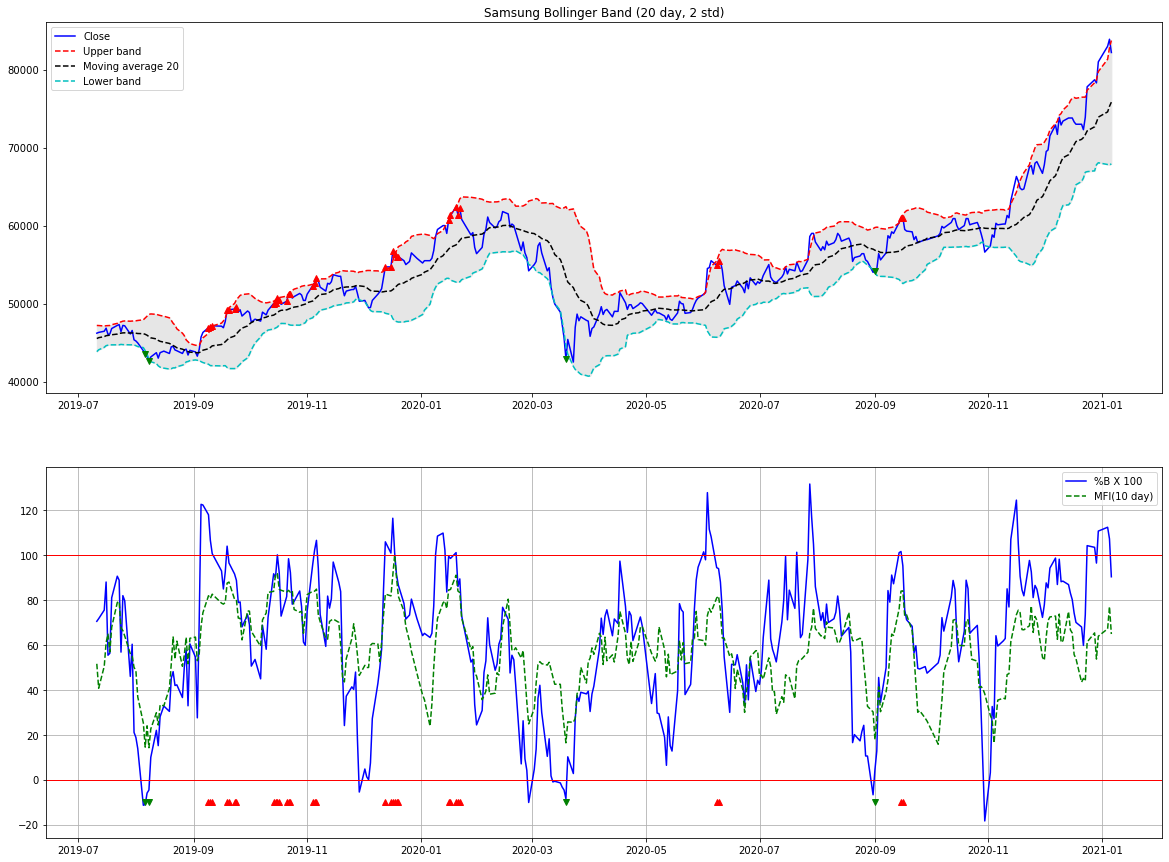

In [7]:
plt.figure(figsize=(20,15))
plt.subplot(211)
plt.plot(df.index, df.close, color = "#0000ff", label = "Close") # 파란색
plt.plot(df.index, df.upper, 'r--', label ="Upper band")
plt.plot(df.index, df["MA20"], 'k--', label ="Moving average 20")
plt.plot(df.index, df.lower, 'c--', label ="Lower band")
plt.fill_between(df.index, df.upper, df.lower, color = '0.9')
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], df.close.values[i], 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], df.close.values[i], 'gv')
plt.legend(loc = 'best')
plt.title("Samsung Bollinger Band (20 day, 2 std)")

plt.subplot(212)
plt.plot(df.index, df.PB * 100, color = "b", label="%B X 100")
plt.plot(df.index, df.MFI10, 'g--', label='MFI(10 day)')
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])
for i in range(len(df.close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], -10, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], -10, 'gv')

plt.axhline(y=100, color='r', linewidth=1)
plt.axhline(y=0, color='r', linewidth=1)
plt.grid(True)
plt.legend(loc="best")
plt.show()

## 미국

In [8]:
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [9]:
df = pdr.get_data_yahoo("TSLA", start = "2019-06-14",end ="2021-01-06")

[*********************100%***********************]  1 of 1 completed


In [10]:
df["MA20"] = df["Adj Close"].rolling(window=20).mean()  # 20개 종가를 이용하여 평균을 구한다 (20일 이평선) => 중간 볼린저 밴드
df['stddev'] = df["Adj Close"].rolling(window=20).std() # 20개 종가를 이용해서 표준편차를 구한 뒤 stddev에 추가
df["upper"] = df["MA20"] + (df.stddev*2)         # 중간 볼린저 밴드 + ( 2 * 표준편차) => 상단 볼린저 밴드
df["lower"] = df["MA20"] - (df.stddev*2)         # 중간 볼린저 밴드 - ( 2 * 표준편차) => 하단 볼린저 밴드
df["PB"] = (df["Adj Close"]-df.lower) / (df.upper - df. lower) 

In [11]:
df["TP"] = (df.High + df.Low + df["Adj Close"]) / 3
df["PMF"] = 0
df["NMF"] = 0

In [12]:
for i in range(len(df["Adj Close"])-1):
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.Volume.values[i+1]
        df.NMF.values[i+1] = 0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.Volume.values[i+1]
        df.PMF.values[i+1] = 0
        
df["MFR"] = df.PMF.rolling(window=10).sum() / df.NMF.rolling(window=10).sum()
df["MFI10"] = 100 - 100 /(1+df["MFR"])
df = df[19:]

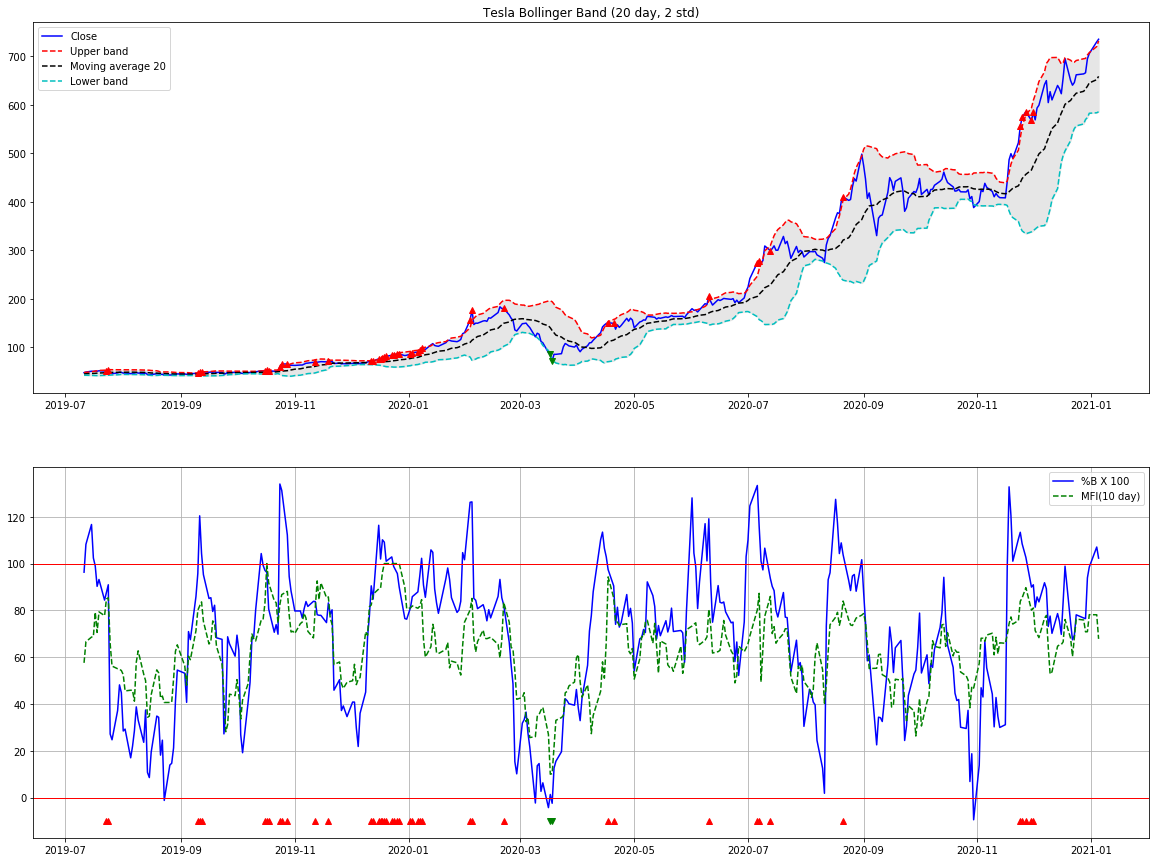

In [13]:
plt.figure(figsize=(20,15))
plt.subplot(211)
plt.plot(df.index, df["Adj Close"], color = "#0000ff", label = "Close") # 파란색
plt.plot(df.index, df.upper, 'r--', label ="Upper band")
plt.plot(df.index, df["MA20"], 'k--', label ="Moving average 20")
plt.plot(df.index, df.lower, 'c--', label ="Lower band")
plt.fill_between(df.index, df.upper, df.lower, color = '0.9')
for i in range(len(df["Adj Close"])):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], df["Adj Close"].values[i], 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], df["Adj Close"].values[i], 'gv')
plt.legend(loc = 'best')
plt.title("Tesla Bollinger Band (20 day, 2 std)")

plt.subplot(212)
plt.plot(df.index, df.PB * 100, color = "b", label="%B X 100")
plt.plot(df.index, df.MFI10, 'g--', label='MFI(10 day)')
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])
for i in range(len(df["Adj Close"])):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], -10, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], -10, 'gv')

plt.axhline(y=100, color='r', linewidth=1)
plt.axhline(y=0, color='r', linewidth=1)
plt.grid(True)
plt.legend(loc="best")
plt.show()

# 반전 매매법

- 매수 : %b > 0.05 and II% > 0
- 매도 : %b < 0.95 and II% < 0

## 국내

In [14]:
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/Administrator/Desktop/stock_study/')

from Investar import Analyzer

In [15]:
mk = Analyzer.MarketDB()

In [16]:
df = mk.get_daily_price("삼성전자","2019-06-14" ,"2021-01-06")

In [17]:
df["MA20"] = df.close.rolling(window=20).mean()  # 20개 종가를 이용하여 평균을 구한다 (20일 이평선) => 중간 볼린저 밴드
df['stddev'] = df.close.rolling(window=20).std() # 20개 종가를 이용해서 표준편차를 구한 뒤 stddev에 추가
df["upper"] = df["MA20"] + (df.stddev*2)         # 중간 볼린저 밴드 + ( 2 * 표준편차) => 상단 볼린저 밴드
df["lower"] = df["MA20"] - (df.stddev*2)         # 중간 볼린저 밴드 - ( 2 * 표준편차) => 하단 볼린저 밴드
df["PB"] = (df.close-df.lower) / (df.upper - df. lower) 

In [18]:
df["II"] = (2*df.close - df.high - df.low)/(df.high-df.low) *df.volume
df["IIP21"] = df["II"].rolling(window=21).sum() / df.volume.rolling(window=21).sum() * 100
df.dropna(inplace=True)

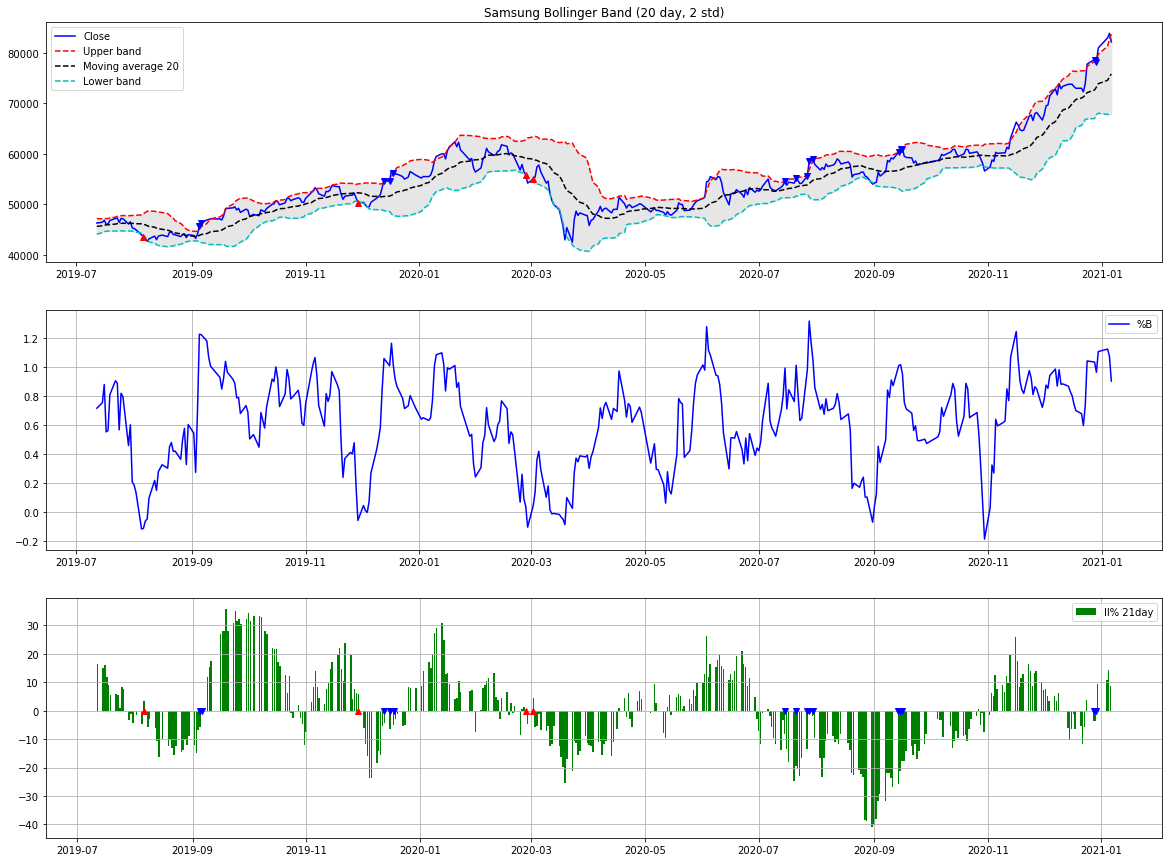

In [19]:
plt.figure(figsize=(20,15))
plt.subplot(311)
plt.plot(df.index, df.close, color = "#0000ff", label = "Close") # 파란색
plt.plot(df.index, df.upper, 'r--', label ="Upper band")
plt.plot(df.index, df["MA20"], 'k--', label ="Moving average 20")
plt.plot(df.index, df.lower, 'c--', label ="Lower band")
plt.fill_between(df.index, df.upper, df.lower, color = '0.9')
for i in range(len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], df.close.values[i], 'r^')
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], df.close.values[i], 'bv')
plt.legend(loc = 'best')
plt.title("Samsung Bollinger Band (20 day, 2 std)")

plt.subplot(312)
plt.plot(df.index, df.PB , color = "b", label="%B")
plt.grid(True)
plt.legend(loc="best")

plt.subplot(313)
plt.bar(df.index, df.IIP21, color='g', label='II% 21day')
for i in range(len(df.close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc="best")
plt.show()

## 미국

In [20]:
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [21]:
df = pdr.get_data_yahoo("TSLA", start = "2019-06-14",end ="2021-01-06")

[*********************100%***********************]  1 of 1 completed


In [22]:
df["MA20"] = df["Adj Close"].rolling(window=20).mean()  # 20개 종가를 이용하여 평균을 구한다 (20일 이평선) => 중간 볼린저 밴드
df['stddev'] = df["Adj Close"].rolling(window=20).std() # 20개 종가를 이용해서 표준편차를 구한 뒤 stddev에 추가
df["upper"] = df["MA20"] + (df.stddev*2)         # 중간 볼린저 밴드 + ( 2 * 표준편차) => 상단 볼린저 밴드
df["lower"] = df["MA20"] - (df.stddev*2)         # 중간 볼린저 밴드 - ( 2 * 표준편차) => 하단 볼린저 밴드
df["PB"] = (df["Adj Close"]-df.lower) / (df.upper - df. lower) 

In [23]:
df["II"] = (2*df["Adj Close"] - df.High - df.Low)/(df.High-df.Low) *df.Volume
df["IIP21"] = df["II"].rolling(window=21).sum() / df.Volume.rolling(window=21).sum() * 100
df.dropna(inplace=True)

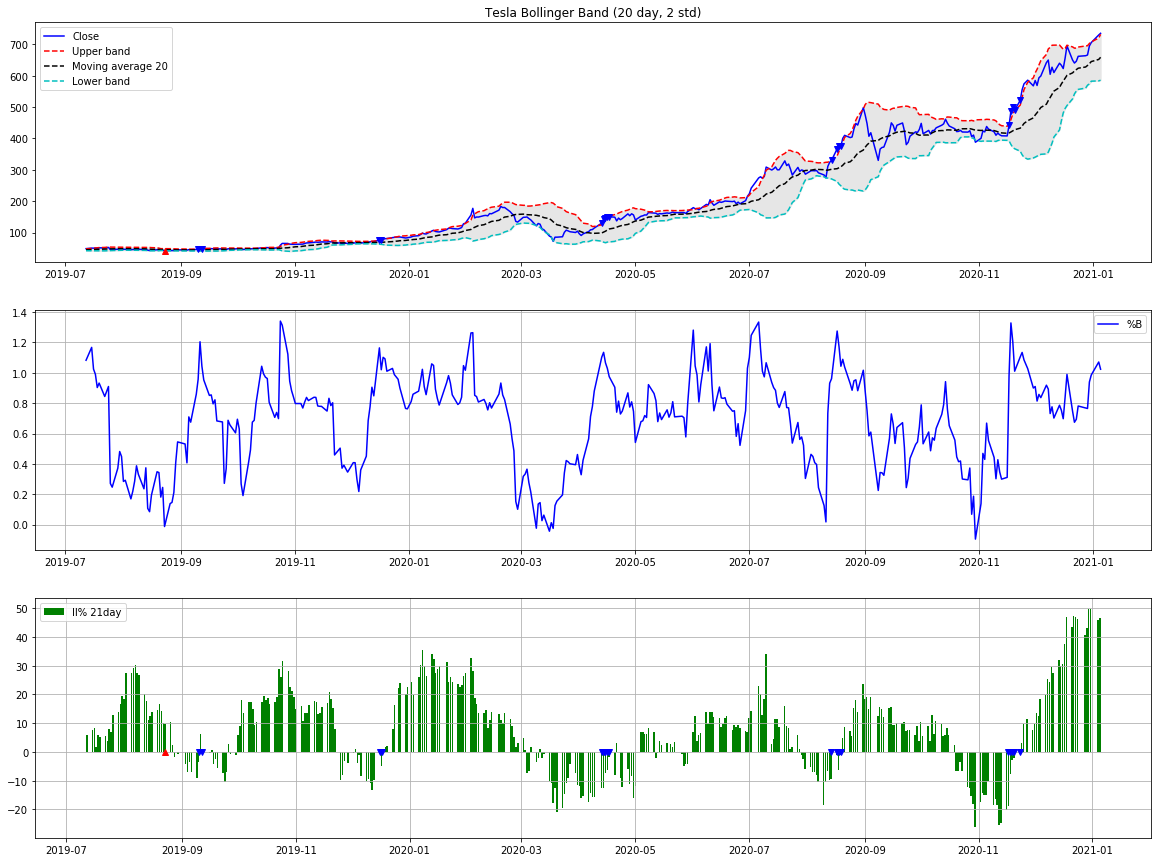

In [24]:
plt.figure(figsize=(20,15))
plt.subplot(311)
plt.plot(df.index, df["Adj Close"], color = "#0000ff", label = "Close") # 파란색
plt.plot(df.index, df.upper, 'r--', label ="Upper band")
plt.plot(df.index, df["MA20"], 'k--', label ="Moving average 20")
plt.plot(df.index, df.lower, 'c--', label ="Lower band")
plt.fill_between(df.index, df.upper, df.lower, color = '0.9')
for i in range(len(df["Adj Close"])):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], df["Adj Close"].values[i], 'r^')
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], df["Adj Close"].values[i], 'bv')
plt.legend(loc = 'best')
plt.title("Tesla Bollinger Band (20 day, 2 std)")

plt.subplot(312)
plt.plot(df.index, df.PB , color = "b", label="%B")
plt.grid(True)
plt.legend(loc="best")

plt.subplot(313)
plt.bar(df.index, df.IIP21, color='g', label='II% 21day')
for i in range(len(df["Adj Close"])):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc="best")
plt.show()